---
title: "Day-11 Machine Learning"
categories:
- Python
- Lecture
output:
 html_document:
   keep_md: true
date: '2022-07-01'
---

# K최근접이웃회귀모델

## 데이터 불러오기

In [5]:
import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )
print(perch_length.shape, perch_weight.shape)

(56,) (56,)


## 데이터 가공
 - 훈련세트와 테스트 사이트로 나눈 후, 1차원 -> 2차원 배열로 전환

In [10]:
# 데이터 세트 분류
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
    )
train_input.shape, test_input.shape, train_target.shape, test_target.shape

# 1차원->2차원
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

train_input.shape, test_input.shape # 데이터가 잘 입력되었는지 확인

((42, 1), (14, 1))

## 데이터 시각화


## 데이터 재가공 

## 모델링

In [13]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3) # 인스턴스화

# 모형 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

## 모델 평가

## 모델 예측
- 서비스를 함

In [16]:
# 독립변수인 길이
print(knr.predict([[50]])) 

[1033.33333333]


- 오차가 있음이 발견

## 모형평가를 위한 시각화

<module 'scipy.spatial.distance' from '/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py'> [[34  8 14]]


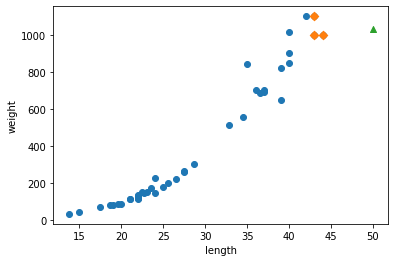

In [28]:
from scipy.spatial import distance
import matplotlib.pyplot as plt

# 50cm 농어의 이웃 구하기
distances, indexes = knr.kneighbors([[50]])
print(distance, indexes)
# 산점도 구하기
fig, ax = plt.subplots()
ax.scatter(train_input, train_target)
# 훈련 세트중 이웃샘플만 다시 그리기
#            길이                     , 무게
ax.scatter(train_input[indexes], train_target[indexes], marker="D")
# 50cm의 농어 데이터
ax.scatter(50,1033,marker='^')
ax.set_xlabel("length")
ax.set_ylabel("weight")
plt.show()

# 선형 회귀 
- y = ax + b
- 기울기를 어떻게 구하냐
  - 평균에 대해 오차를 항상 생각
  - y = b 
  - y = ax + b (a < 0)
  - y = ax + b (a > 0)
  - 세가지 그래프를 그려보고 오차가 최소인 기울기로 결정한다


In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

## 예측

In [32]:
print(lr.predict([[100]]))

[3192.69585141]


## 선형회귀의 모형
- 기울기, 절편

In [34]:
#       기울기,      절편
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


## 다항 회귀
- 물고기의 크기가 작아지면 무게가 -가 나와서 성립이 안된다 
  - 농어 1cm = -650g
- 직선의 기울기 대신, 곡선의 기울기를 쓰자
- $y= ax^2 + bx + c$   

In [39]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)
print("---train---")
print(train_poly[:3])
print("---test---")
print(test_poly[:3])

(42, 2) (14, 2)
---train---
[[384.16  19.6 ]
 [484.    22.  ]
 [349.69  18.7 ]]
---test---
[[ 70.56   8.4 ]
 [324.    18.  ]
 [756.25  27.5 ]]


In [41]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2,50]]))

[1573.98423528]


In [43]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


- y = 무게, x = 길이
- $y = 1.01* x^2 + -21.6*x + 116.05 $

## 시각화 

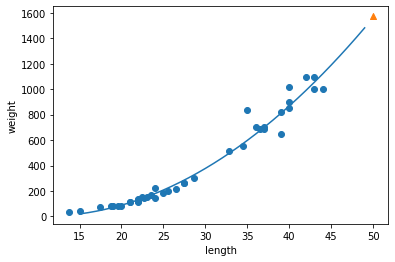

In [58]:
import matplotlib.pyplot as plt
point = np.arange(15,50)
fig, ax = plt.subplots()
ax.scatter(train_input, train_target)
ax.plot(point, 1.01*point**2 - 21.6*point + 116.05)
ax.scatter(50,1574,marker = "^")
ax.set_xlabel("length")
ax.set_ylabel("weight")
plt.show()